[View in Colaboratory](https://colab.research.google.com/github/Larissa13/Mac6914/blob/master/5_2_Convnets_with_small_datasets.ipynb)

In [1]:
!pip install kaggle
!pip install pydrive

    100% |████████████████████████████████| 61kB 2.7MB/s 
    100% |████████████████████████████████| 235kB 5.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
    100% |████████████████████████████████| 993kB 6.8MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io, shutil, os
import zipfile

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
os.environ['KAGGLE_USERNAME'] = "lariop"
os.environ['KAGGLE_KEY'] = "bf56400749cb75008ed988a21e284010"

In [6]:
!kaggle competitions files -c dogs-vs-cats
!kaggle competitions download -c dogs-vs-cats

name                   size  creationDate         
--------------------  -----  -------------------  
sampleSubmission.csv   87KB  2013-09-20 15:47:40  
test1.zip             271MB  2013-09-20 15:49:17  
train.zip             543MB  2013-09-20 15:52:50  
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 30.7MB/s]
 95% 257M/271M [00:02<00:00, 115MB/s]
100% 271M/271M [00:02<00:00, 110MB/s]
 99% 539M/543M [00:05<00:00, 85.4MB/s]
100% 543M/543M [00:05<00:00, 113MB/s] 


In [0]:
zip_ref = zipfile.ZipFile('test1.zip', "r")
zip_ref.extractall()
zip_ref.close()

In [0]:
zip_ref = zipfile.ZipFile('train.zip', "r")
zip_ref.extractall()
zip_ref.close()

**Importando os dados de train**

In [0]:
original_dataset_dir = 'train'
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


In [0]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

# **Construindo a rede**

In [18]:
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [19]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))

In [0]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr =1e-4), loss='binary_crossentropy' , metrics = ['acc'])

**Pré-Processamento dos dados**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 139ms/step - loss: 0.6934 - acc: 0.5140 - val_loss: 0.6761 - val_acc: 0.5560
Epoch 2/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6585 - acc: 0.6080 - val_loss: 0.6408 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6229 - acc: 0.6530 - val_loss: 0.6260 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5760 - acc: 0.7000 - val_loss: 0.5921 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5362 - acc: 0.7260 - val_loss: 0.6091 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5049 - acc: 0.7580 - val_loss: 0.6103 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.4789 - acc: 0.7665 - val_loss: 0.5624 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 1

In [0]:
model.save('cats_and_dogs_small_1.h5')

**Gráfico com as medidas de desempenho**

In [0]:
import matplotlib.pyplot as plt

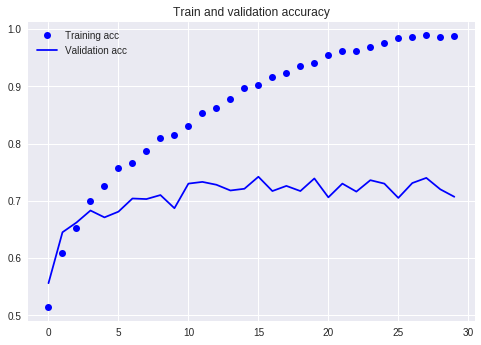

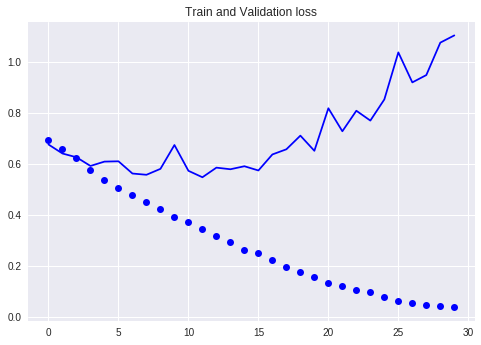

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Train and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Train and Validation loss")
plt.legend

plt.show()

Estes gráficos são característicos de casos em que ocorre sobreajuste (overfitting) no modelo após treinamento. Acurácia alta e perda baixa no conjunto de treinamento, mas acurácia baixa e perda alta no conjunto de validação.

**Fazendo Data Augmentation**

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

In [0]:
from keras.preprocessing import image

In [0]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

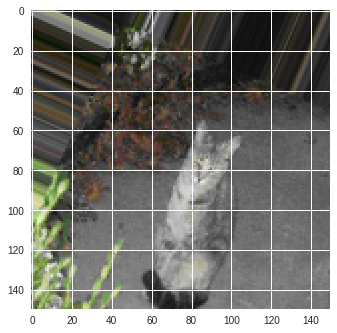

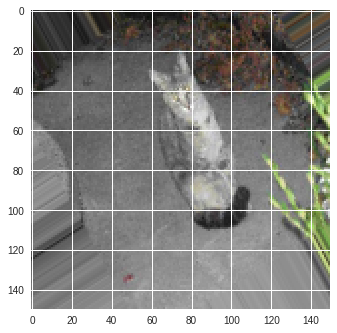

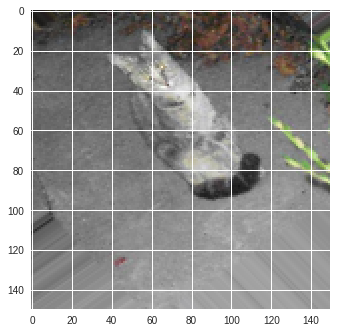

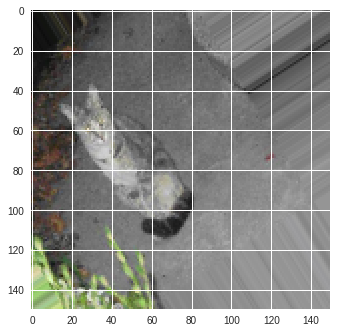

In [44]:
img_path=fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4 == 0:
    break
    
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(54, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #to help reducing overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data = validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6914 - acc: 0.5287 - val_loss: 0.6882 - val_acc: 0.5089
Epoch 2/100
100/100 [==============================] - 35s 349ms/step - loss: 0.6786 - acc: 0.5609 - val_loss: 0.6596 - val_acc: 0.6085
Epoch 3/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6588 - acc: 0.5909 - val_loss: 0.6576 - val_acc: 0.5742
Epoch 4/100
100/100 [==============================] - 38s 382ms/step - loss: 0.6444 - acc: 0.6284 - val_loss: 0.6029 - val_acc: 0.6777
Epoch 5/100
100/100 [==============================] - 33s 334ms/step - loss: 0.6335 - acc: 0.6391 - val_loss: 0.5941 - val_acc: 0.6605
Epoch 6/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6115 - acc: 0.6584 - val_loss: 0.5828 - val_acc: 0.6745
Epoch 7/100
100/100 [==============================] - 36s 361ms/step - loss: 0.5993 - acc: 0.6625 -

In [0]:
model.save('cats_and_dogs_small_2.h5')

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Train and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Train and Validation loss")
plt.legend

plt.show()